# 1. Vector Quantization (1H-1H30)

(A) First of all, start by finalizing the given competive learning algorithm, complete the update rule for the centroid and for the learning rate value, $\alpha$.

(B) Afterwards you'll need to implement the following algorithms:
1. Frequency sensitive learning (a slight alteration of competitive learning)
2. K-means (a batched form of competitive learning)
3. **[@Home]** Implement the neural gas algorithm (a winner-take-most alteration of competitive learning)

(C) You'll try out 3 different centroid initializations for these algorithms:
1. A (given) *random* init
2. A *random selection* of points
3. KMeans++

Test those 3 initializations with the 4 given datasets and answer the following questions:
* For each algorithm, which initialization works best and why?
* Should you apply a larger/lower learning rate to K-means? Why?

Answers:
* K-means++ for K-means and sampling for the others because of forgotten centroids (centroids that have no assigned points). FSL does partly solve this last problem
* K-means uses a batch update and thus its learning rate can be bumped up, otherwise it will converge too early due to the annealing of $\alpha$.


In [2]:
# -- Imports
from show_functions import show_quantization

import scipy.io
import numpy as np
import random
from matplotlib import pyplot as plt
try:
    import seaborn as sns
    use_seaborn = True
    sns.set()
except:
    use_seaborn = False

## A.0 Competitive Learning

In [3]:
# -- Competitive Learning
def comp_learning(X: np.ndarray, Y: np.ndarray, n_epochs: int = 100, alpha: float = 0.1, beta: float = 0.99, min_epsilon: float = 1e-3):
    """ Computes and returns the centroids updated via the competitive learning algorithm
        
        Args:
            X: a matrix of shape PxD representing the data-points
            Y: a matrix of shape QxD representing the centroids' initilization
            n_epochs: the maximum number of epochs before stopping the algorithm
            alpha: the learning rate
            beta: the learning rate annealing rate
            min_epsilon: the minimal stopping criterion
        
        Returns:
            Y: a matrix of shape QxD containing the new centroid
            epoch: the number of epochs before returning (is always <= n_epochs)
    """
    assert len(X.shape)==2 and len(Y.shape)==2, f"Expected X and Y to both be 2D matrices but instead got {X.shape} and {Y.shape}"
    for epoch in range(n_epochs):
        prev_Y = Y.copy()
        
        # Shuffle Data
        np.random.shuffle(X)
        
        # Use up every data point
        for xp in X:
            ## TODO
                
        # Update Learning Rate
        alpha = ## TODO
        
        # 'Intelligent' stopping criterion
        if False: ## TODO
            break

    return Y, epoch+1

## B.1 Frequency Sensitive Learning

In [4]:
# -- Frequency Sensitive Learning
def fsl(X, Y, n_epochs=100, alpha=0.1, beta=0.99, min_epsilon=1e-3):
    """ Computes and returns the centroids updated via the Frequency Sensitive Learning algorithm
    """
    assert len(X.shape)==2 and len(Y.shape)==2, f"Expected X and Y to both be 2D matrices but instead got {X.shape} and {Y.shape}"

    pass

## B.2 K-means

In [5]:
# -- K-means
def kmeans(X, Y, n_epochs=100, min_epsilon=1e-3, use_broadcasting=True):
    """ Computes and returns the centroids updated via the K-means algorithm
    
        Args:
            use_broadcasting: if True will use more memory for the K-means algorithm
    """
    assert len(X.shape)==2 and len(Y.shape)==2, f"Expected X and Y to both be 2D matrices but instead got {X.shape} and {Y.shape}"
    
    pass

## B.3 Neural Gas

In [6]:
# -- Neural Gas
def neural_gas(X, Y, lambda0=0.5, n_epochs=100, alpha=0.1, beta=0.99, min_epsilon=1e-3):
    """ Computes and returns the centroids updated via the Neural Gas algorithm
    
        Args:
            lambda0: The higher lambda0, the more influence far away points will have
    """
    assert len(X.shape)==2 and len(Y.shape)==2, f"Expected X and Y to both be 2D matrices but instead got {X.shape} and {Y.shape}"
    
    pass

## C. Different Initializations

In [16]:
# -- Kmeans++ init
def kmeans_pp(X: np.ndarray, Q: int):
    """ Computes Q centroids for X following the kmeans++ init. algorithm
        
        Args:
            X: a matrix of shape PxD representing the data-points
            Q: the number of centroids
        
        Returns:
            Y: a matrix of shape QxD containing the initialized centers
    """
    pass

def get_inits(X, Q, i):
    inits = {}
    mini = np.min(X, axis=0)
    maxi = np.max(X, axis=0)
    if i == 1:
        inits["Crappy"] = np.array([
            [0,3],[1,0],[1,1.5]
        ])

    ## TODO
    return inits

## D. VQ-loop

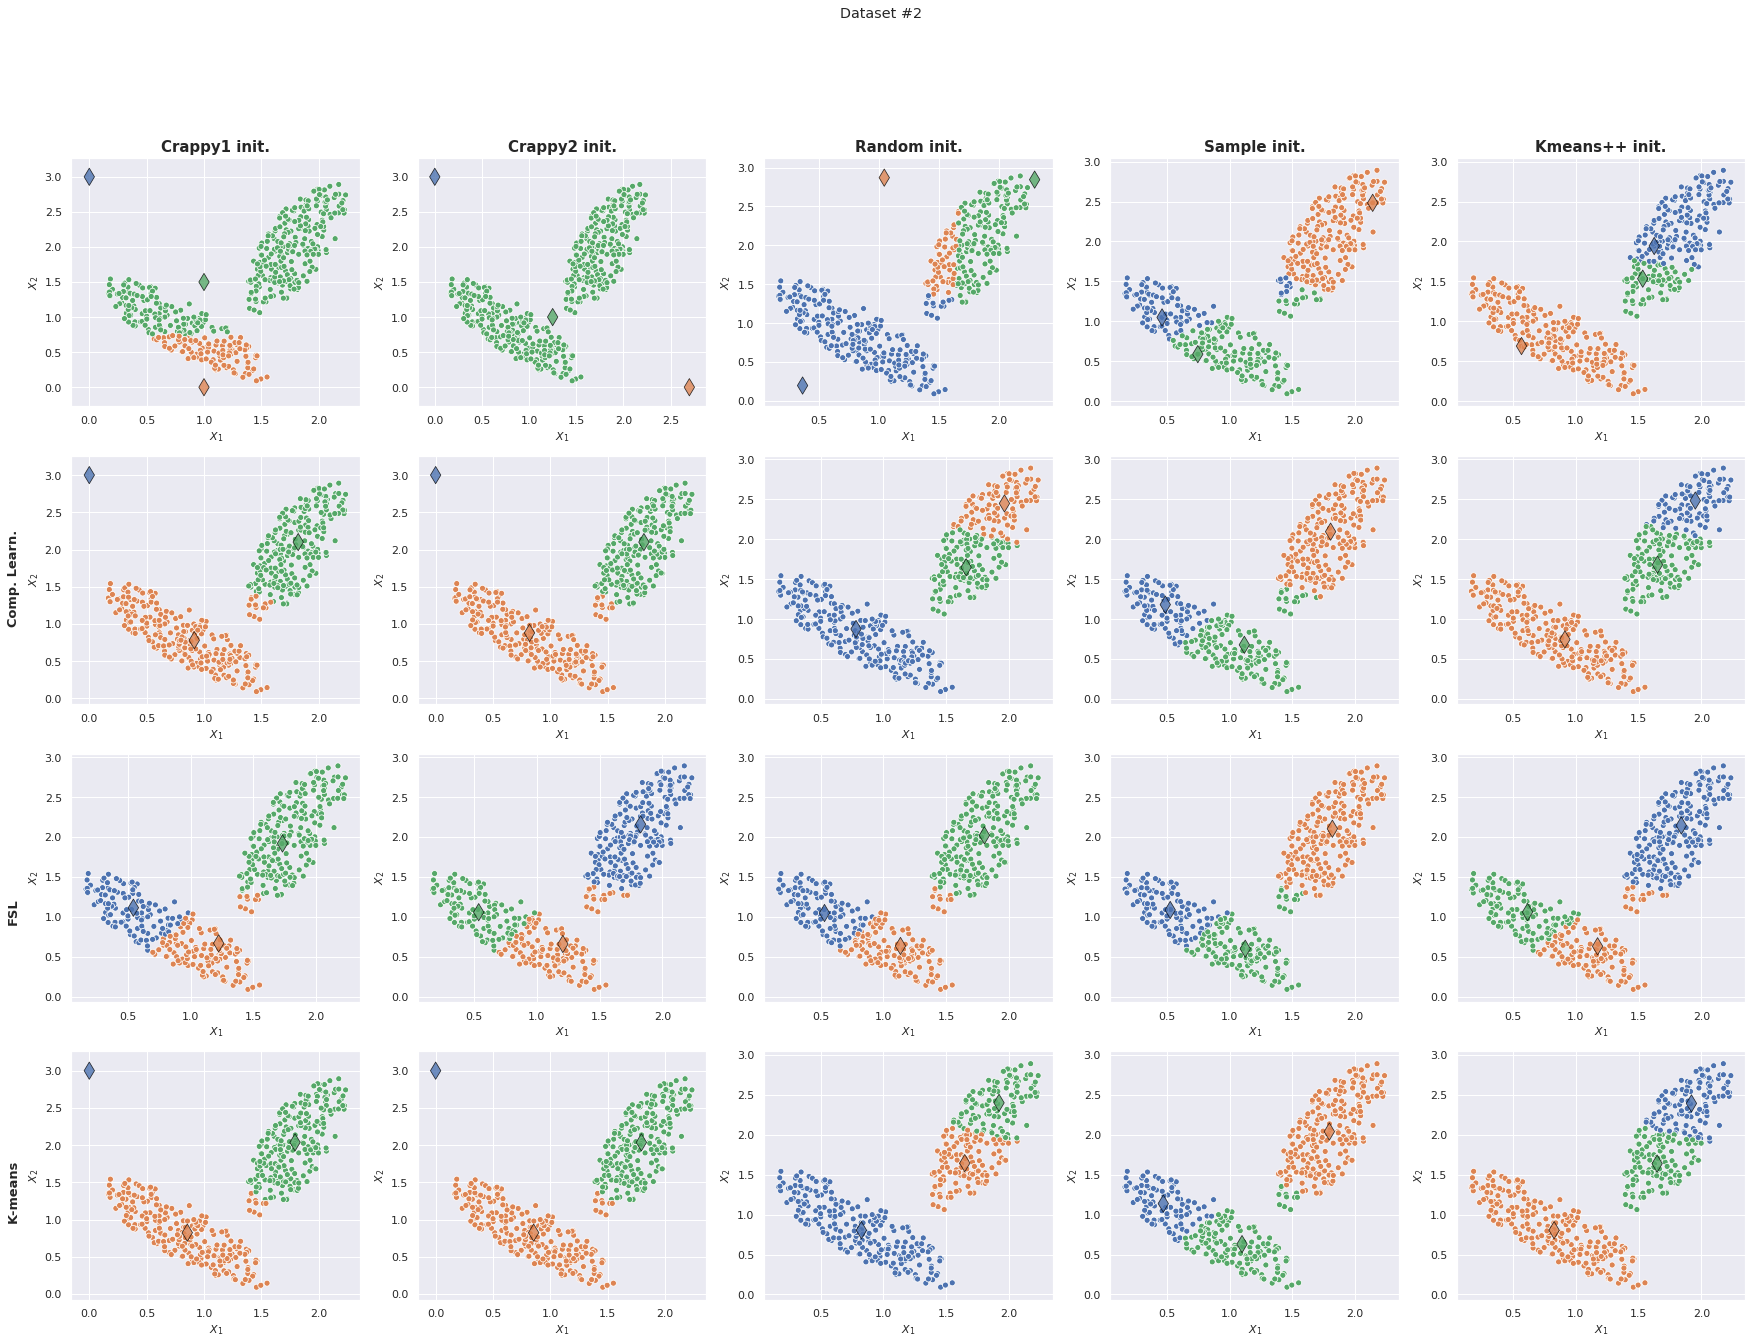

In [21]:
data = {}
for i in range(1,5):
    df = scipy.io.loadmat(f"data1/dataset_{i}.mat")
    data[i-1] = df['X']

# Uncomment more functions once you've implemented them
fxs = {"Init": (lambda x,y,*args,**kwargs: (y,0)), "Comp. Learn.": comp_learning}#, "FSL": fsl, "K-means": kmeans}#, "Neural Gas": neural_gas}
Q = 3
i = 1
X = data[i]
X = np.array(X)
all_Y_inits = get_inits(X, Q, i)

fig = plt.figure(figsize=((len(all_Y_inits)+1)*5, 1+5*len(fxs)))
idx = 1
for cl_type, fx in fxs.items():
    for init_idx, (init_type, Y_init) in enumerate(all_Y_inits.items()):
        ax = fig.add_subplot(len(fxs), len(all_Y_inits), idx)
        centroids, fit_epochs = fx(X, Y_init.copy(), n_epochs=10)#, min_epsilon=1e-3)
        try:
            show_quantization(X, centroids, use_seaborn=use_seaborn, ax=ax)
        except:
            pass
        idx += 1
        if cl_type=="Init":
            ax.set_title(f"{init_type} init.", fontweight="bold", fontsize=15)
        elif init_idx==0:
            title = ax.set_title(f"{cl_type}", fontweight="bold", fontsize=13, rotation='vertical',
                                 x=-0.2, y=0.3)
    

fig.suptitle(f"Dataset #{i+1}")
plt.show()
plt.close()

# Linear Regression
## Correlation and Univariate regression

This part constitutes an introduction to linear regression.
* **Load the dataset** and plot each feature in function of the blood sugar levels. If you had to select 1 feature only, which one would you keep? 
* **Implement the correlation** (numpy.corrcoef) factor to check your answer. What does a negative correlation mean?
* **Plot** the resulting linear regression

In [1]:
df = scipy.io.loadmat(f"data2/diabetes.mat")
X = df["X"]
n_samples, n_feats = X.shape
t = df["t"]
t_names = ["age", "sex", "bmi", "blood_pressure", "serum_1", 
           "serum_2", "serum_3", "serum_4", "serum_5", "serum_6"]

NameError: name 'scipy' is not defined

In [37]:
from sklearn.base import BaseEstimator

class MyLinearRegressor(BaseEstimator):
    def __init__(self, add_bias=True):
        super().__init__()
        self.add_bias = add_bias
        
    def fit(self, X, y):
        if self.add_bias:
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=-1)
        if len(y.shape) < 2:
            y = np.expand_dims(y, axis=-1)
        ## TODO
        return self
    
    def predict(self, X):
        pass
    
    def fit_predict(self, X, y):
        return self.fit(X, y).predict(X)
    
    def score(self, X, y_true):
        return 0